In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys, os
from scipy.interpolate import interp1d
from scipy.optimize import minimize
sys.path.append('documents/BNL/jupyter/notebooks/calibrator')
os.environ['LUSEE_DRIVE_DIR']='/home/anze/work/lusee/Drive/'
from algorithms import  Comb, Calibrator
import pickle

In [2]:
Asfix=np.load('Asfix.npy')
Ns=np.load('Ns.npy')
kar = np.load('kar.npy')

In [9]:
comb=Comb(kar,response=Asfix, noise=Ns)
C = Calibrator(comb, alpha=-0.3, add_noise=True)
C.analyze_data(alpha_start=+0.3,tmax=60)
C.cross_correlate()
res = C.results



t= res['t']

Non zero weights 243
1.0053096491487338e-05


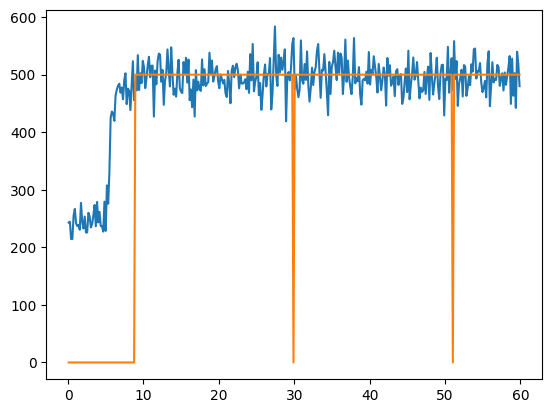

In [10]:
plt.plot (t, res['SNR2'])
plt.plot (t, res['detect3']*500)



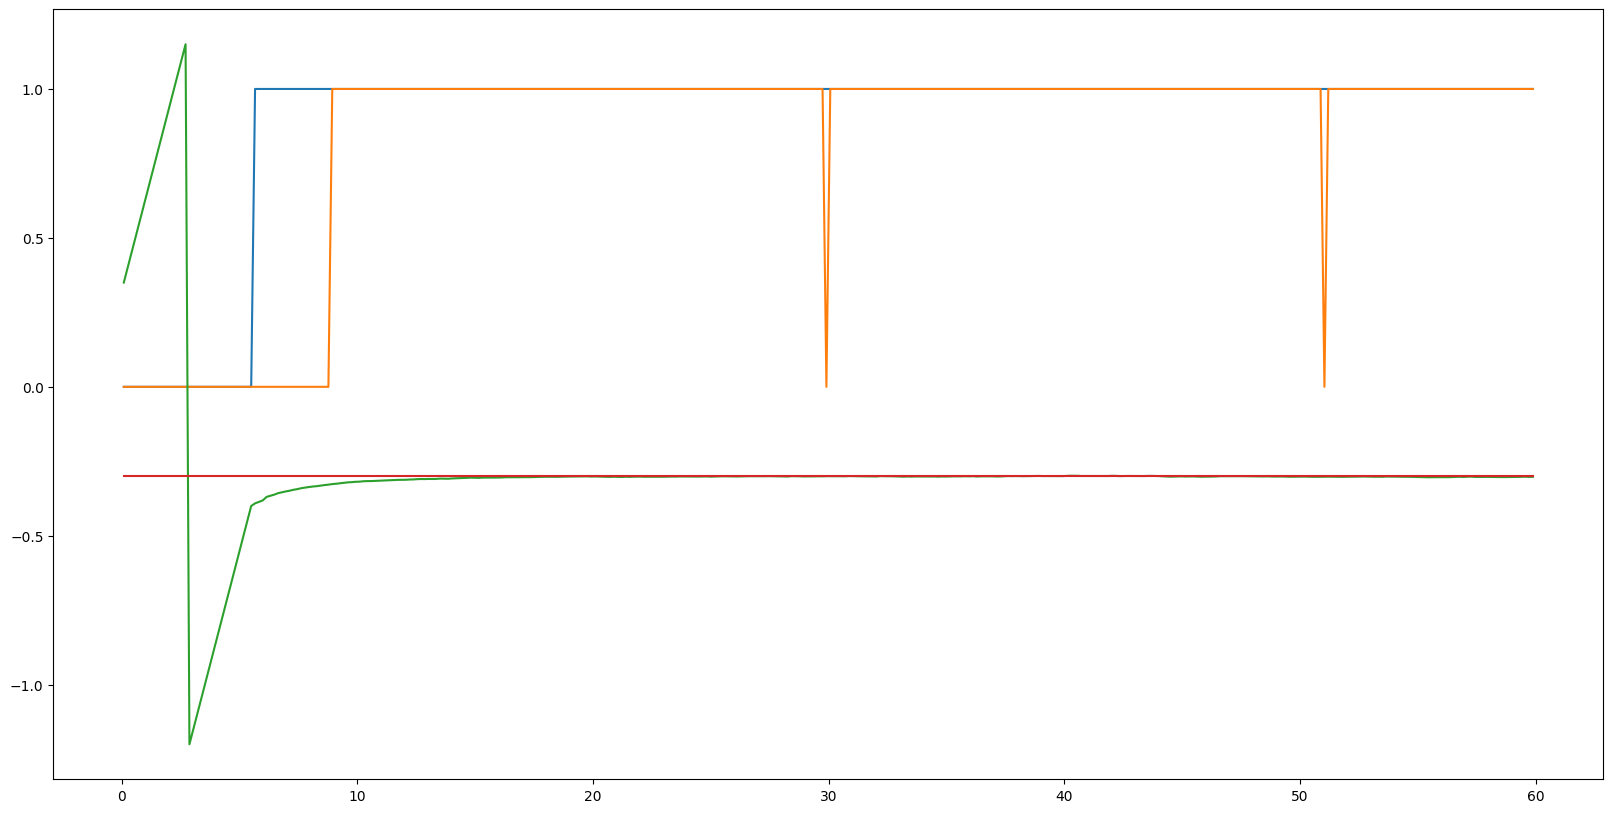

In [11]:
plt.figure(figsize=(20,10))
t = res['t']
plt.plot(t,res['detect']>0)
plt.plot(t,res['detect3'])
plt.plot(t,res['alphadet'])
plt.plot(t,-res['alpha'])
#plt.xlim(250,500)

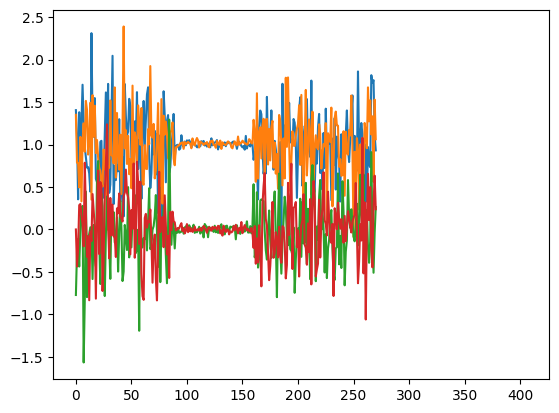

In [15]:
plt.plot(np.real(res['stage3_phased'].T))
plt.plot(np.imag(res['stage3_phased'].T))